In [1]:
import numpy as np
import pandas as pd
import mne

import sys
sys.path.append('../')
from src import data

import matplotlib.pylab as plt
!date -I

2024-03-04


In [2]:
%ls {data.path('external/pytepfit/')}

all_avg_high-stc-lh.stc
all_avg_high-stc-rh.stc
all_avg.mat_avg_high_epoched
fsaverage/
GMFA.npy
leadfield
network_colour.xlsx
only_high_trial.mat
real_EEG
ROI_MAPPING.csv
Schaefer2018_200Parcels_7Networks_count.csv
Schaefer2018_200Parcels_7Networks_distance.csv
Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv
source_estimates/
stc_sim_evoked_new-lh.stc
stc_sim_evoked_new-rh.stc
stim_weights.npy
sub_0_fittingresults_stim_exp.pkl
sub_10_fittingresults_stim_exp.pkl
sub_11_fittingresults_stim_exp.pkl
sub_12_fittingresults_stim_exp.pkl
sub_13_fittingresults_stim_exp.pkl
sub_14_fittingresults_stim_exp.pkl
sub_15_fittingresults_stim_exp.pkl
sub_16_fittingresults_stim_exp.pkl
sub_17_fittingresults_stim_exp.pkl
sub_18_fittingresults_stim_exp.pkl
sub_19_fittingresults_stim_exp.pkl
sub_1_fittingresults_stim_exp.pkl
sub_2_fittingresults_stim_exp.pkl
sub_3_fittingresults_stim_exp.pkl
sub_4_fittingresults_stim_exp.pkl
sub_5_fittingresults_stim_exp.pkl
sub_6_fittingresults_stim

In [3]:
sim_stc = mne.read_source_estimate(data.path('external/pytepfit/stc_sim_evoked_new'))
real_stc = mne.read_source_estimate(data.path('external/pytepfit/all_avg_high-stc'))

In [4]:
df = pd.read_csv(data.path('external/pytepfit/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'))
# https://github.com/ThomasYeoLab/CBIG/blob/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Centroid_coordinates/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv
df

,ROI Label,ROI Name,R,A,S
0,1,7Networks_LH_Vis_1,-24,-54,-10
1,2,7Networks_LH_Vis_2,-26,-78,-14
2,3,7Networks_LH_Vis_3,-46,-70,-8
3,4,7Networks_LH_Vis_4,-10,-68,-4
4,5,7Networks_LH_Vis_5,-26,-96,-12
...,...,...,...,...,...
195,196,7Networks_RH_Default_PFCdPFCm_6,28,30,42
196,197,7Networks_RH_Default_PFCdPFCm_7,24,24,54
197,198,7Networks_RH_Default_pCunPCC_1,12,-54,14
198,199,7Networks_RH_Default_pCunPCC_2,6,-48,30


In [5]:
label = df['ROI Name']

In [6]:
%ls {data.path('external/pytepfit/fsaverage')}

bem/           fsaverage-fwd  fsaverage-trans.fif  mri/      scripts/
fsaverage-bem  fsaverage-src  label/               mri.2mm/  surf/


In [7]:
src = mne.read_source_spaces(data.path('external/pytepfit/fsaverage/fsaverage-src'), verbose=False)

/tmp/ipykernel_60677/3454925096.py:1: RuntimeWarning: This filename (/home/katterrina/fi_muni/0_diplomka/data/external/pytepfit/fsaverage/fsaverage-src) does not conform to MNE naming conventions. All source space files should end with -src.fif, -src.fif.gz, _src.fif, _src.fif.gz, -fwd.fif, -fwd.fif.gz, _fwd.fif, _fwd.fif.gz, -inv.fif, -inv.fif.gz, _inv.fif or _inv.fif.gz
  src = mne.read_source_spaces(data.path('external/pytepfit/fsaverage/fsaverage-src'), verbose=False)


In [8]:
labels_Schaefer = mne.read_labels_from_annot('fsaverage', parc='Schaefer2018_200Parcels_7Networks_order', subjects_dir=data.path('external/pytepfit/'), verbose=False)

In [9]:
labels_Schaefer_names = []

for xx in range(1,len(labels_Schaefer)-1):
  labels_Schaefer_names.append(labels_Schaefer[xx].name[10:])

In [10]:
real_label_ts = mne.extract_label_time_course(real_stc, labels_Schaefer, src, mode='mean_flip')
sim_label_ts = mne.extract_label_time_course(sim_stc, labels_Schaefer, src, mode='mean_flip')

Extracting time courses for 202 labels (mode: mean_flip)
Extracting time courses for 202 labels (mode: mean_flip)


In [11]:
labels_Schaefer

[<Label | fsaverage, '-rh', rh : 13957 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_Cing_1-lh', lh : 1295 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_Cing_2-lh', lh : 714 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_PFCl_1-lh', lh : 872 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_PFCl_2-lh', lh : 1089 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_PFCl_3-lh', lh : 1197 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_PFCl_4-lh', lh : 1668 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_PFCl_5-lh', lh : 1660 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_PFCl_6-lh', lh : 1255 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_Par_1-lh', lh : 1124 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_Par_2-lh', lh : 1696 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_Par_3-lh', lh : 1117 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_Temp_1-lh', lh : 972 vertices>,
 <Label | fsaverage, '7Networks_LH_Cont_pCun_1-lh', lh : 1226 vertices>,
 <Label

In [12]:
len(labels_Schaefer[1:-1])

200

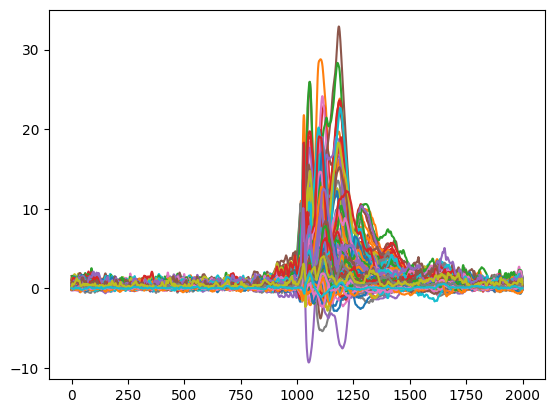

In [13]:
plt.plot(real_label_ts[1:-1,:].T);

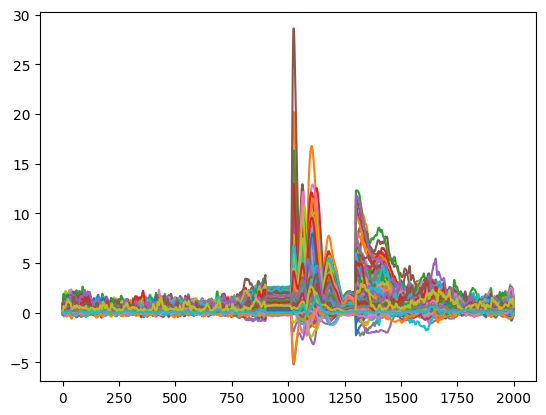

In [14]:
plt.plot(sim_label_ts[1:-1,:].T);

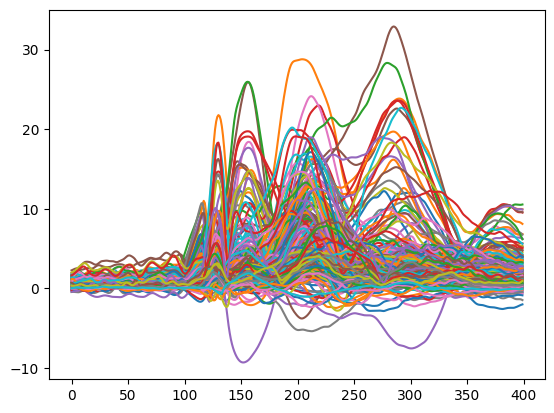

In [15]:
plt.plot(real_label_ts[1:-1,900:1300].T);

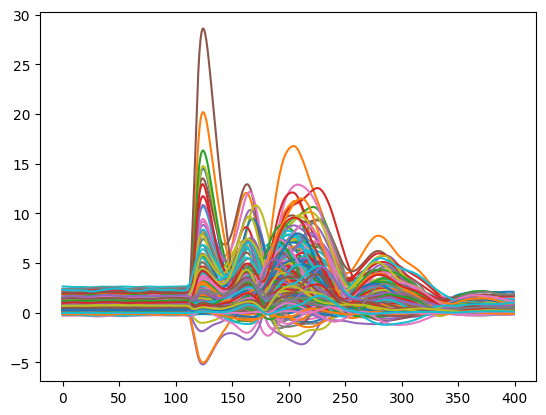

In [16]:
plt.plot(sim_label_ts[1:-1,900:1300].T);

In [17]:
ts_labels = np.array([l.name for l in labels_Schaefer[1:-1]])

In [18]:
np.savez(data.path('external/pytepfit/source_estimates/simulated.npz'), ts=sim_label_ts[1:-1,900:1300].T, labels=ts_labels)

In [19]:
np.savez(data.path('external/pytepfit/source_estimates/empirical.npz'), ts=real_label_ts[1:-1,900:1300].T, labels=ts_labels)